In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
ds = pd.read_csv('./data/covtype.csv')

In [4]:
scale = StandardScaler()

In [5]:
X = ds.drop('Cover_Type', axis=1)

In [6]:
scaled_num = pd.DataFrame(scale.fit_transform(X.iloc[:,0:10]), columns = X.iloc[:,0:10].columns)

In [7]:
X = pd.concat([scaled_num, X.iloc[:,10:]], axis = 1)

In [8]:
y = ds['Cover_Type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=650, test_size=0.3)

In [10]:
rf = RandomForestClassifier(random_state=650)

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 650,
 'verbose': 0,
 'warm_start': False}

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=650)

In [36]:
rf_pred = rf.predict(X_test)

In [38]:
accuracy_score(rf_pred, y_test)

0.952009133467964

In [41]:
param_grid = {
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4],
    'n_estimators': [250]
}

In [42]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 2)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time= 1.9min
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time= 1.9min
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time= 1.9min
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=4, n_estimators=250; total time= 1.8min
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=4, n_estimators=250; total time= 1.9min
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=4, n_estimators=250; total time= 2.1min
[CV] END bootstrap=True, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time= 2.0min
[CV] END bootstrap=True, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time= 1.8min
[CV] END bootstrap=True, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time= 1.7min
[CV] END boot

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=650),
             param_grid={'bootstrap': [True], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [250]},
             verbose=2)

In [44]:
grid_search.best_params_

{'bootstrap': True,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [45]:
best_rf = grid_search.best_estimator_

In [46]:
best_rf_pred = best_rf.predict(X_test)

In [47]:
accuracy_score(best_rf_pred, y_test)

0.9525254727372866

In [68]:
importances = pd.DataFrame({"feature_names" : best_rf.feature_names_in_, 
                            "importances" : best_rf.feature_importances_}).sort_values(by="importances",
                                                                                       ascending=False)

<Axes: xlabel='importances', ylabel='feature_names'>

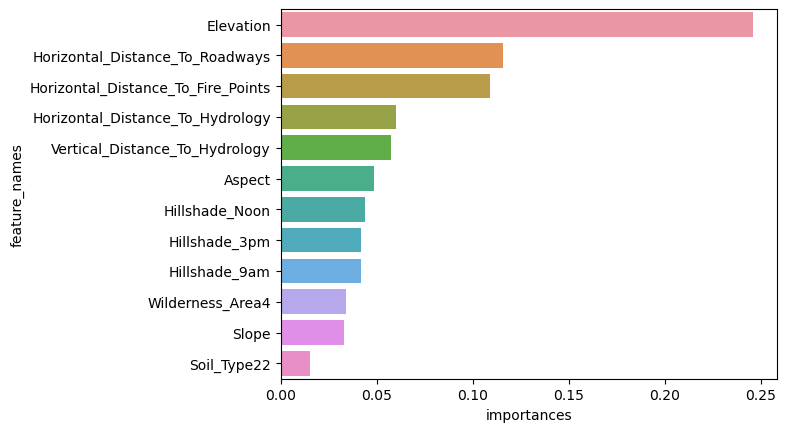

In [69]:
sns.barplot(x=importances["importances"][0:12], 
            y=importances["feature_names"][0:12])

# Trying again to compare with equal distribution

In [31]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

In [11]:
rf = RandomForestClassifier(random_state=650,
                            n_estimators=250)

In [18]:
ds = pd.concat([X, y], axis=1)

each_tree_type = []
for i in ds['Cover_Type'].unique():
    each_tree_type.append(ds[ds['Cover_Type'] == i]) #now each element in this list is a dataframe containing each class of tree

from sklearn.utils import resample

downsampled_trees = []

#downsampling each tree type data frame to match the size of the smallest class, Cover Type 4 with 2747 rows
for i in each_tree_type: 
    downsampled_trees.append(resample(i, replace = False, n_samples = len(each_tree_type[6]), random_state = 650))

#now we need to transform this list of data frames back into one dataframe: 
ds_dsamp = pd.concat(downsampled_trees)

ds_dsamp = ds_dsamp.sample(frac = 1, random_state = 650)

In [21]:
X2 = ds_dsamp.drop('Cover_Type', axis=1)

y2 = ds_dsamp['Cover_Type']

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=650, test_size=0.3)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=650)

In [28]:
rf_pred = rf.predict(X_test)

In [29]:
accuracy_score(rf_pred, y_test)

0.9525254727372866

In [32]:
balanced_accuracy_score(rf_pred, y_test)

0.9417587733036588

In [33]:
cohen_kappa_score(rf_pred, y_test)

0.9233291692648075

In [34]:
rf.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=250, random_state=650)

In [35]:
rf_eq_pred = rf.predict(X_test)

In [36]:
accuracy_score(rf_eq_pred, y_test)

0.7513080594822839

In [37]:
balanced_accuracy_score(rf_eq_pred, y_test)

0.6232433828611598

In [38]:
cohen_kappa_score(rf_eq_pred, y_test)

0.6259294958340503

In [48]:
results = pd.DataFrame({
    'model': ['Imbalanced', 'Equalized'],
    'accuracy': [accuracy_score(rf_pred, y_test), accuracy_score(rf_eq_pred, y_test)],
    'balanced accuracy': [balanced_accuracy_score(rf_pred, y_test), balanced_accuracy_score(rf_eq_pred, y_test)],
    'kappa': [cohen_kappa_score(rf_pred, y_test), cohen_kappa_score(rf_eq_pred, y_test)]
})

In [49]:
results

,model,accuracy,balanced accuracy,kappa
0,Imbalanced,0.952525,0.941759,0.923329
1,Equalized,0.751308,0.623243,0.625929


In [66]:
imbal_conf = confusion_matrix(rf_pred, y_test)

print(imbal_conf)

[[59860  2002     3     0    31     5   283]
 [ 3621 82704   164     0   581   150    41]
 [    2   163 10254    90    26   399     0]
 [    0     2    49   695     0    26     0]
 [   24   106     8     0  2164     1     0]
 [    7   104   196    24    14  4587     0]
 [  122    31     0     0     0     0  5765]]


Text(113.9222222222222, 0.5, 'Predicted label')

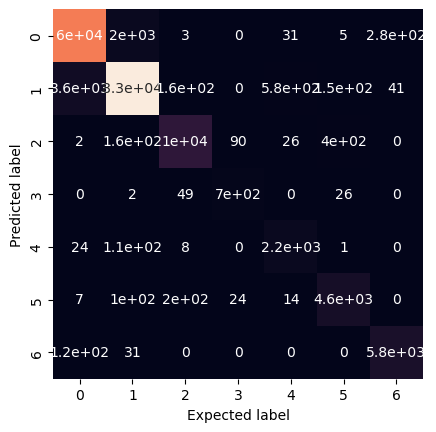

In [67]:
sns.heatmap(imbal_conf, square=True, annot=True, cbar=False)
plt.xlabel("Expected label")
plt.ylabel("Predicted label")

In [56]:
eq_conf = confusion_matrix(rf_eq_pred, y_test)

print(eq_conf)

[[49090 15385     0     0     3     0   196]
 [ 9131 59027    54     0    64    20     2]
 [   23  1811  8883     4    35   428     0]
 [    0    45   476   805     0   122     0]
 [ 1261  6026    82     0  2697    33     2]
 [  183  2320  1179     0    17  4565     0]
 [ 3948   498     0     0     0     0  5889]]


Text(113.9222222222222, 0.5, 'Predicted label')

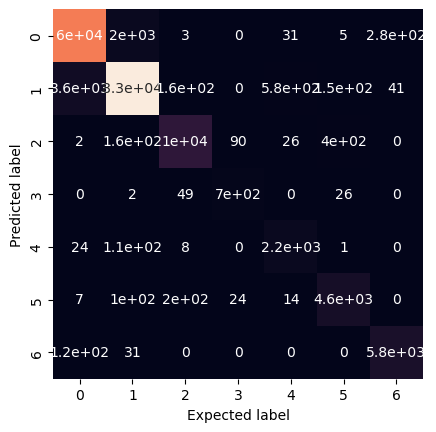

In [57]:
sns.heatmap(unbal_conf, square=True, annot=True, cbar=False)
plt.xlabel("Expected label")
plt.ylabel("Predicted label")

In [76]:
print('Imbalanced classes model \n')
print(imbal_conf, '\n\n\n')
print('Equalized classes model \n')
print(eq_conf)

Imbalanced classes model 

[[59860  2002     3     0    31     5   283]
 [ 3621 82704   164     0   581   150    41]
 [    2   163 10254    90    26   399     0]
 [    0     2    49   695     0    26     0]
 [   24   106     8     0  2164     1     0]
 [    7   104   196    24    14  4587     0]
 [  122    31     0     0     0     0  5765]] 



Equalized classes model 

[[49090 15385     0     0     3     0   196]
 [ 9131 59027    54     0    64    20     2]
 [   23  1811  8883     4    35   428     0]
 [    0    45   476   805     0   122     0]
 [ 1261  6026    82     0  2697    33     2]
 [  183  2320  1179     0    17  4565     0]
 [ 3948   498     0     0     0     0  5889]]


In [73]:
imbal_conf - eq_conf

array([[ 10770, -13383,      3,      0,     28,      5,     87],
       [ -5510,  23677,    110,      0,    517,    130,     39],
       [   -21,  -1648,   1371,     86,     -9,    -29,      0],
       [     0,    -43,   -427,   -110,      0,    -96,      0],
       [ -1237,  -5920,    -74,      0,   -533,    -32,     -2],
       [  -176,  -2216,   -983,     24,     -3,     22,      0],
       [ -3826,   -467,      0,      0,      0,      0,   -124]])

Text(0.5, 1.0, 'Diff between imbalanced and equalized models')

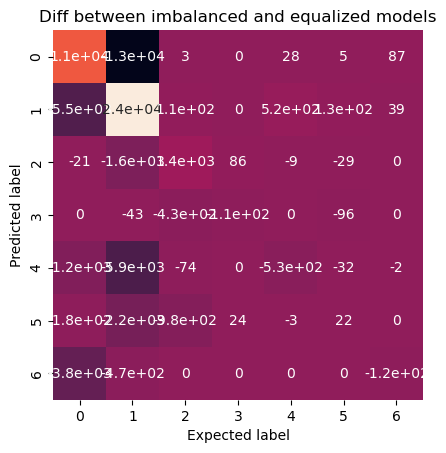

In [75]:
sns.heatmap(imbal_conf - eq_conf, square=True, annot=True, cbar=False)
plt.xlabel("Expected label")
plt.ylabel("Predicted label")
plt.title('Diff between imbalanced and equalized models')